In [1]:
import pandas as pd
import json
import requests
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
import time
import psycopg2
import random
from gather_and_display_metadata import *

In [3]:
# Get all the datasets from API except the ones from PLAZI
summary_metadata = get_metadata_from_API(None, '7ce8aef0-9e92-11dc-8738-b8a03c50a862')
# This was run last time the 08/06/2018

################ Split dataset per type ################
checklist_summary_metadata = summary_metadata[summary_metadata.type == "CHECKLIST"]
occurrence_summary_metadata = summary_metadata[summary_metadata.type == "OCCURRENCE"]
sampling_summary_metadata = summary_metadata[summary_metadata.type == "SAMPLING_EVENT"]
metadata_summary_metadata = summary_metadata[summary_metadata.type == "METADATA"]

In [4]:
################ Get metadata for example dataset ################
example_datasets = ["5d17a4fd-7249-46c0-a56b-1924d477b29e",
                    "966b3e29-f1e4-4190-badd-100bc989788f",
                    "11c00ed9-1c1b-47d1-9eb4-66a491c7d7b3",
                    "83e20573-f7dd-4852-9159-21566e1e691e"]
summary_example_datasets = get_metadata_from_API(example_datasets)

In [5]:
################ Esthetic ################

example_color = '#bcc2c6'
alpha_example = 0.7
alpha_one_bar = 0.2
general_metadata_color = '#ffbcbc'
language_list_color = ['#ffbcbc','#ffeaf4','#fff3a8','#a8ffad','#45a7f7']
contact_metadata_color = '#d0e8f4'
taxon_metadata_color = '#b1e2ce'
geographic_metadata_color = '#99beff'
time_metadata_color = '#fce0a4'
time_list_color = ['#fce0a4','#99beff','#b1e2ce']
keyword_metadata_color = '#ffc9ee'
method_metadata_color = '#fff3b2'
additionalInfo_metadata_color = '#c4c1be'
number_kw = 10

# Summary statistics - sample metadata

The example datasets are the following:
* [Data from ILAM surveys conducted by ARCOS in Rusumo landscape for year 2016](https://www.gbif.org/dataset/5d17a4fd-7249-46c0-a56b-1924d477b29e)
* [Djamde Wildlife Reserve in Togo: diversity of woody species](https://www.gbif.org/dataset/966b3e29-f1e4-4190-badd-100bc989788f)
* [Monitoring data of marine turtles on the Togolese coast over 2012-2013 years](https://www.gbif.org/dataset/11c00ed9-1c1b-47d1-9eb4-66a491c7d7b3)
* [Bird tracking - GPS tracking of Lesser Black-backed Gulls and Herring Gulls breeding at the southern North Sea coast](https://www.gbif.org/dataset/83e20573-f7dd-4852-9159-21566e1e691e)

## Title, Description and language

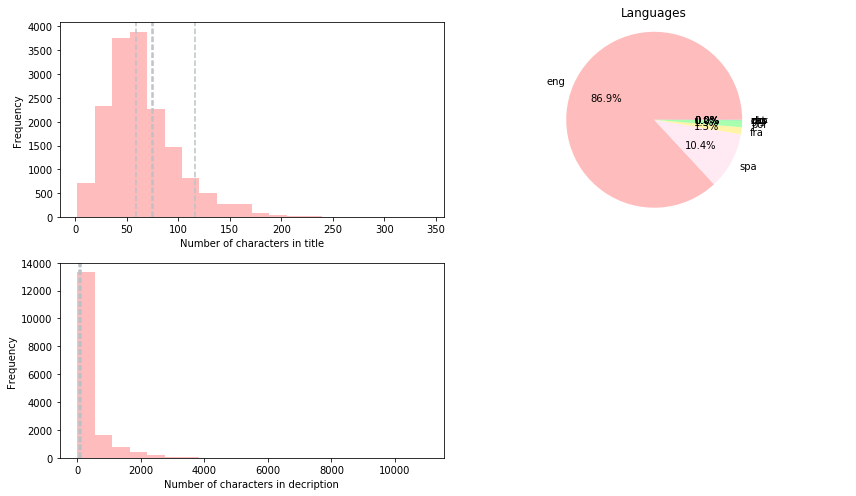

In [6]:
plot_general_metadata(summary_metadata, summary_example_datasets, general_metadata_color, example_color, language_list_color)

## Contacts

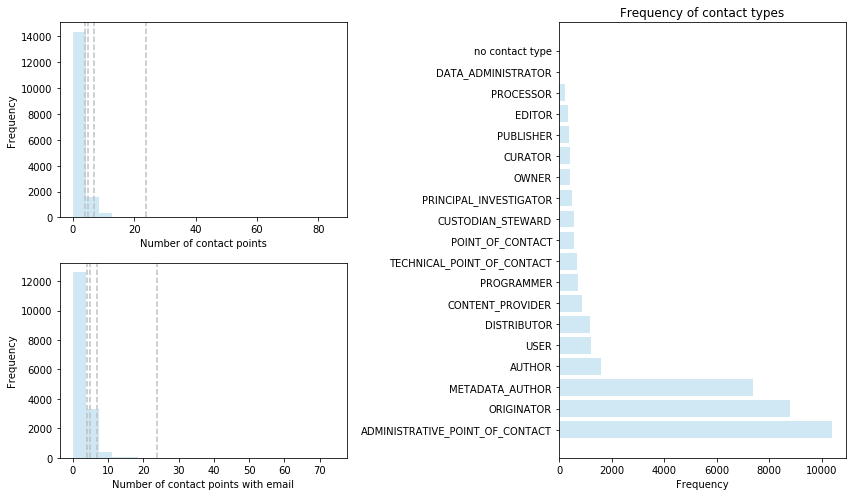

In [7]:
plot_contact_metadata(summary_metadata, contact_metadata_color, summary_example_datasets, example_color, alpha_example)

## Taxonomic coverage

### Checklist

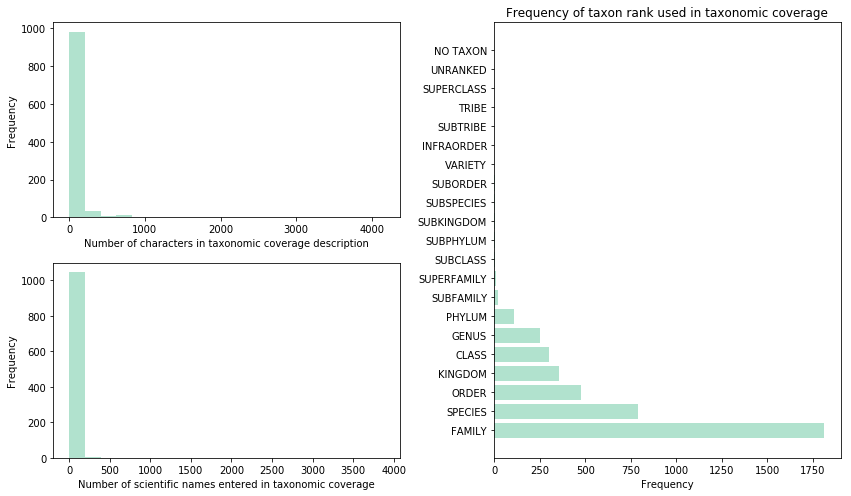

In [8]:
plot_taxon_metadata(checklist_summary_metadata, taxon_metadata_color, alpha_one_bar)

### Occurrence

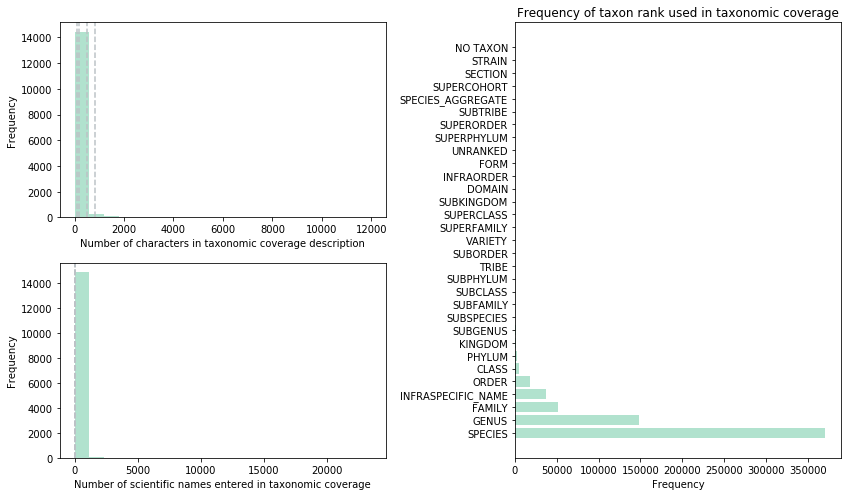

In [9]:
plot_taxon_metadata(occurrence_summary_metadata, taxon_metadata_color, alpha_one_bar, summary_example_datasets, example_color, alpha_example)

### Metadata

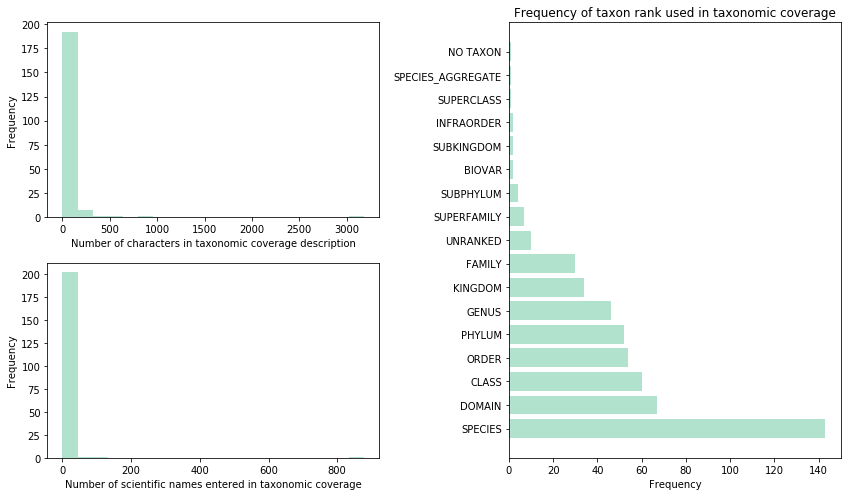

In [10]:
plot_taxon_metadata(metadata_summary_metadata, taxon_metadata_color, alpha_one_bar)

### Sampling events

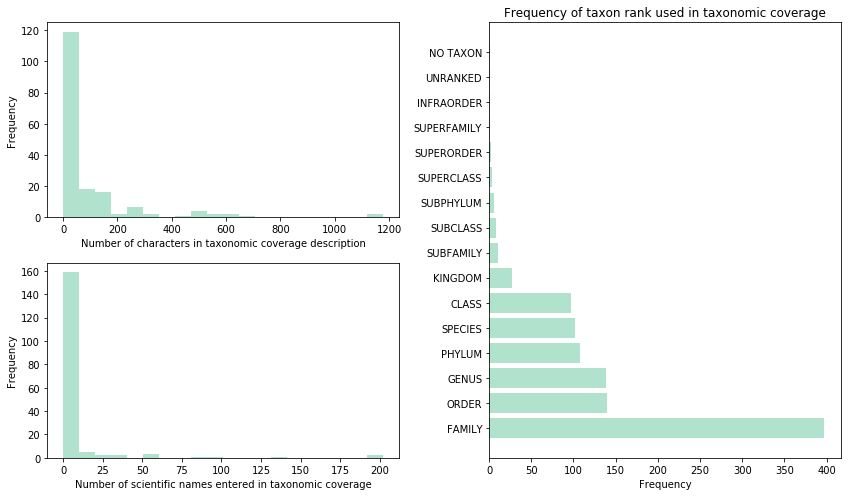

In [11]:
plot_taxon_metadata(sampling_summary_metadata, taxon_metadata_color, alpha_one_bar)

## Geographic coverage

### Checklist

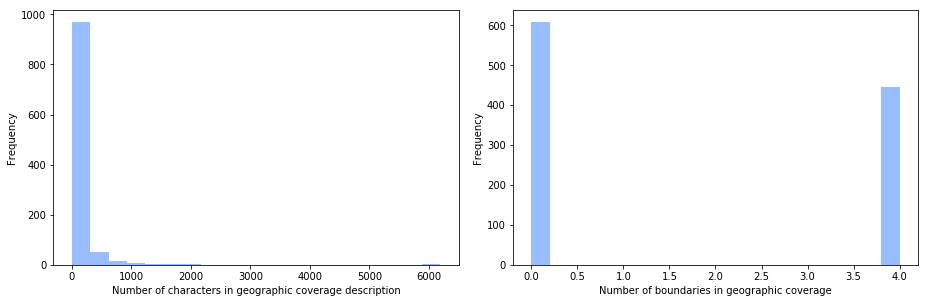

In [12]:
plot_geographic_metadata(checklist_summary_metadata, geographic_metadata_color)

### Occurrence

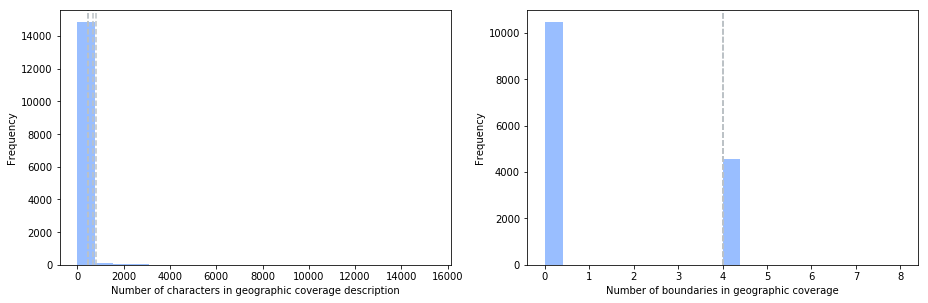

In [13]:
plot_geographic_metadata(occurrence_summary_metadata, geographic_metadata_color, summary_example_datasets, example_color)

### Metadata

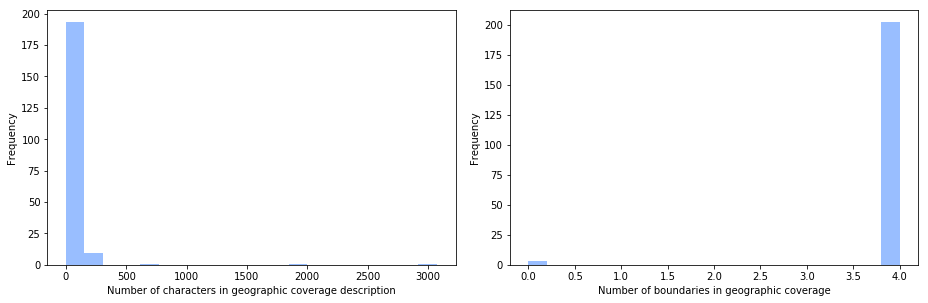

In [14]:
plot_geographic_metadata(metadata_summary_metadata, geographic_metadata_color)

### Sampling event

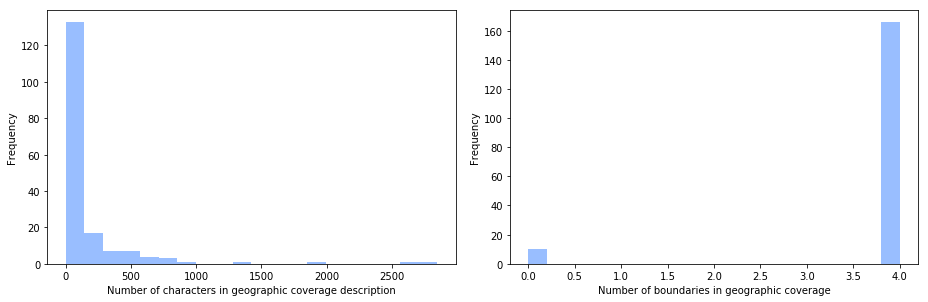

In [15]:
plot_geographic_metadata(sampling_summary_metadata, geographic_metadata_color)

## Time coverage

### Occurrence

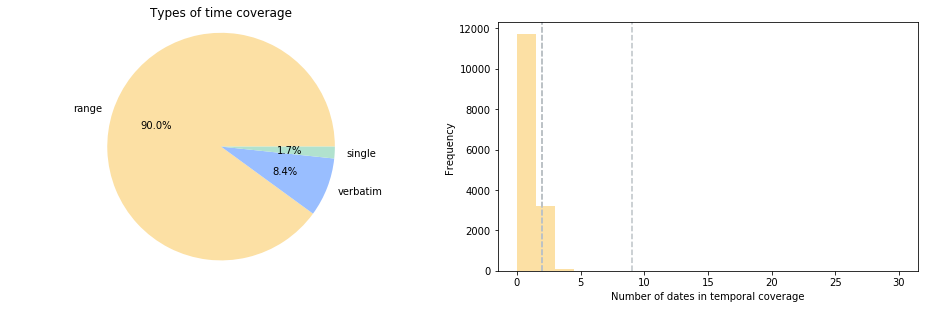

In [16]:
plot_time_metadata(occurrence_summary_metadata, time_metadata_color, time_list_color, summary_example_datasets, example_color)

### Metadata

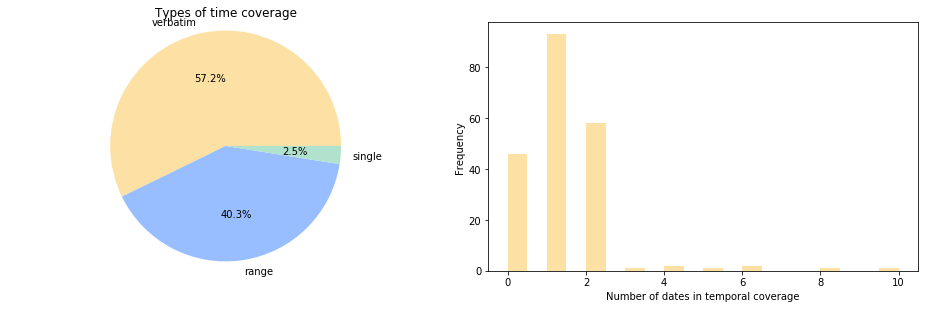

In [17]:
plot_time_metadata(metadata_summary_metadata, time_metadata_color, time_list_color)

### Sampling event

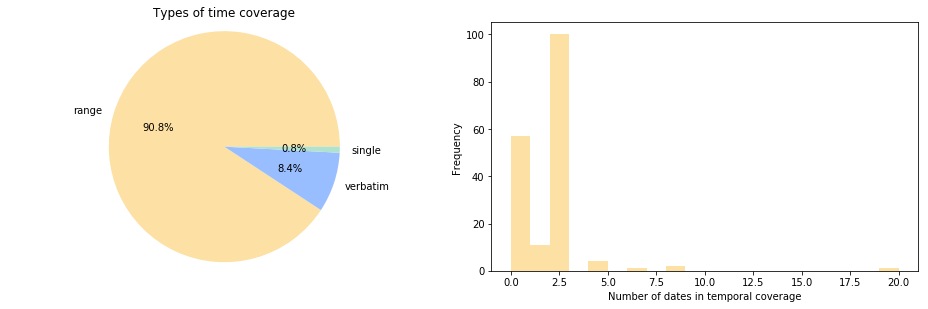

In [18]:
plot_time_metadata(sampling_summary_metadata, time_metadata_color, time_list_color)

## Keywords

### Checklist

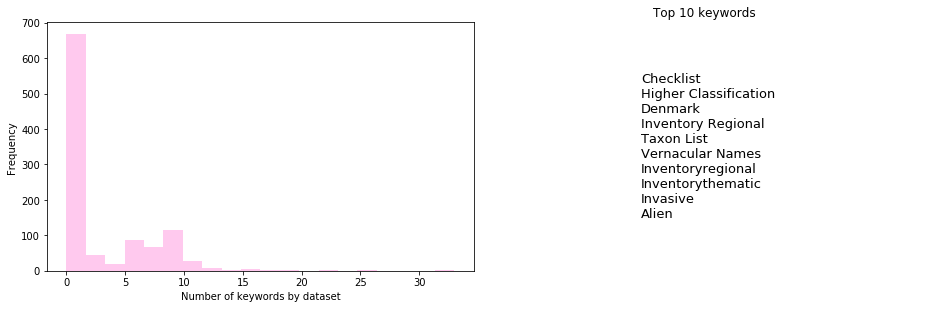

In [19]:
plot_keyword_metadata(checklist_summary_metadata, keyword_metadata_color, number_kw)

### Occurrence

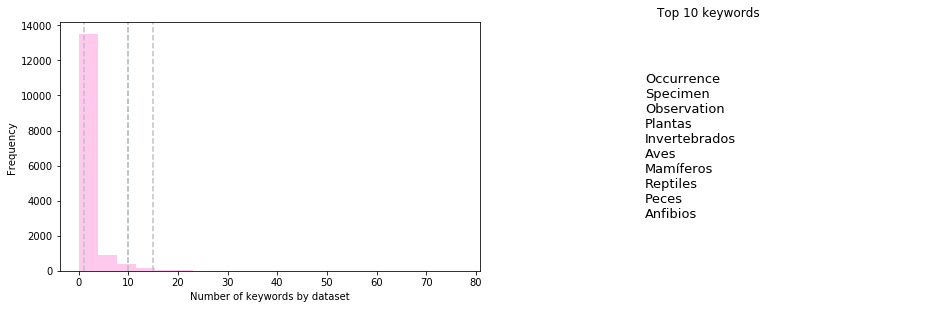

In [20]:
plot_keyword_metadata(occurrence_summary_metadata, keyword_metadata_color, number_kw, summary_example_datasets, example_color)

### Metadata

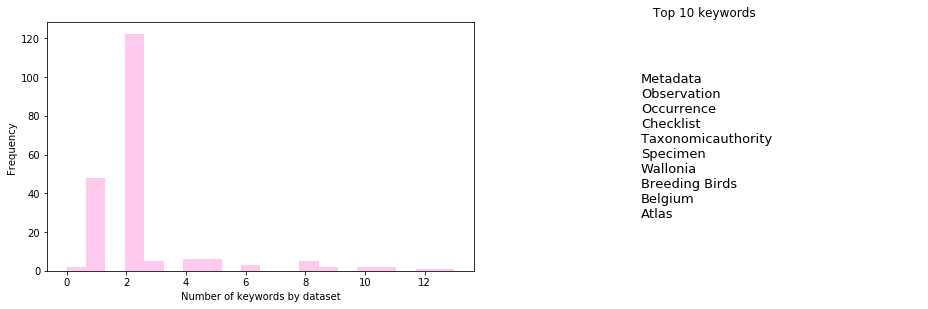

In [21]:
plot_keyword_metadata(metadata_summary_metadata, keyword_metadata_color, number_kw)

### Sampling events

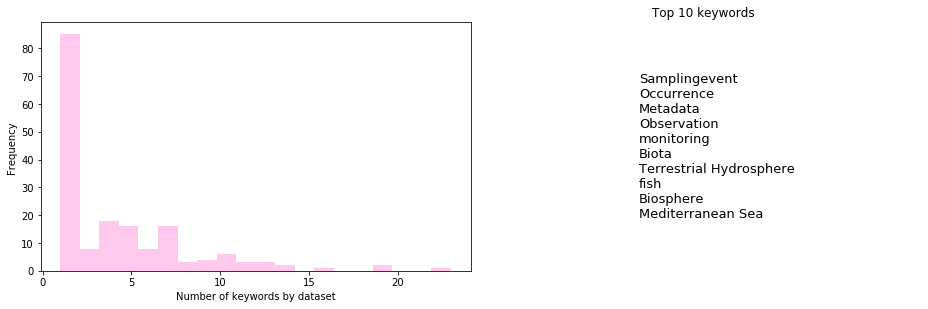

In [22]:
plot_keyword_metadata(sampling_summary_metadata, keyword_metadata_color, number_kw)

## Methods

### Occurrence

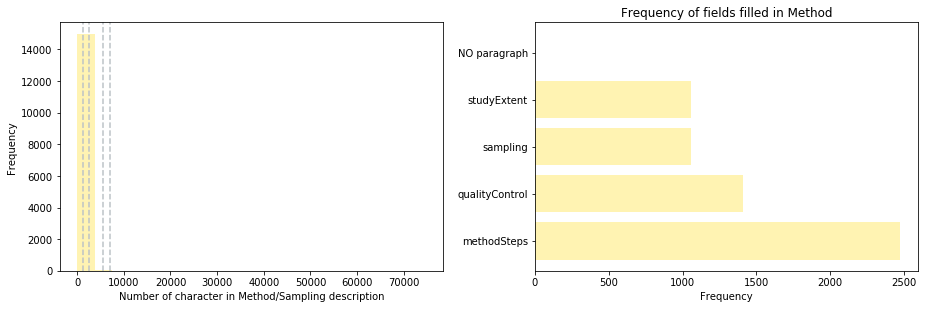

In [23]:
plot_medthod_metadata(occurrence_summary_metadata, method_metadata_color, alpha_one_bar, summary_example_datasets, example_color, alpha_example)

### Metadata

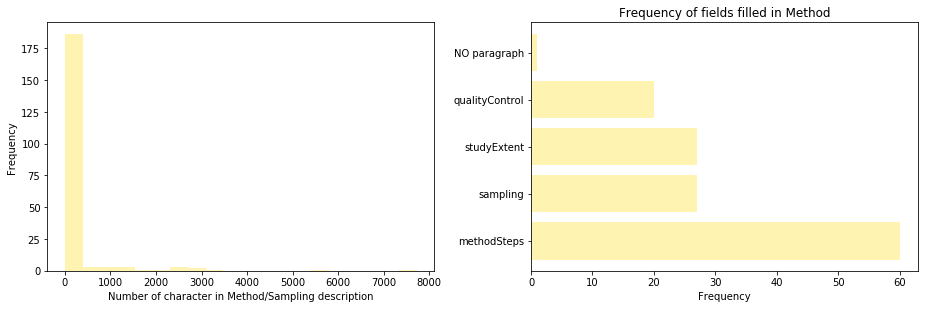

In [24]:
plot_medthod_metadata(metadata_summary_metadata, method_metadata_color, alpha_one_bar)

### Sampling event

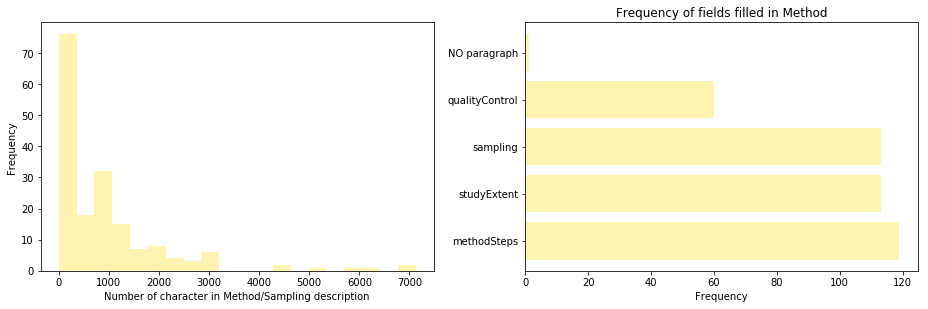

In [25]:
plot_medthod_metadata(sampling_summary_metadata, method_metadata_color, alpha_one_bar)

## Additional information

Text(0,0.5,'Frequency')

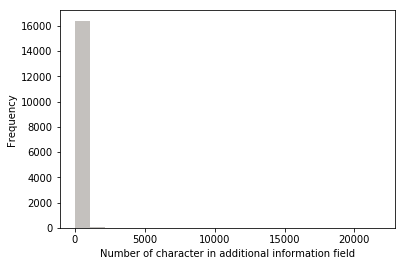

In [26]:
plt.hist(summary_metadata.additionalInfo_len.tolist(), bins = 20, color = '#c4c1be')
plt.xlabel("Number of character in additional information field")
plt.ylabel("Frequency")

In [27]:
summary_metadata.to_csv("summary_all_metadata_PLAZIexcluded.txt", sep = "\t")